In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/UTEC/Ciclo 5/Machine Learning/Proyectos/Proyecto Texto/train.csv'
df = pd.read_csv(path)
df.head()


,message,label
0,I saw this movie in NEW York city. I was waiti...,neg
1,This is a German film from 1974 that is someth...,neg
2,I attempted watching this movie twice and even...,neg
3,On his birthday a small boys tells his mother ...,neg
4,"The person who wrote the review ""enough with t...",pos


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  25000 non-null  object
 1   label    25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


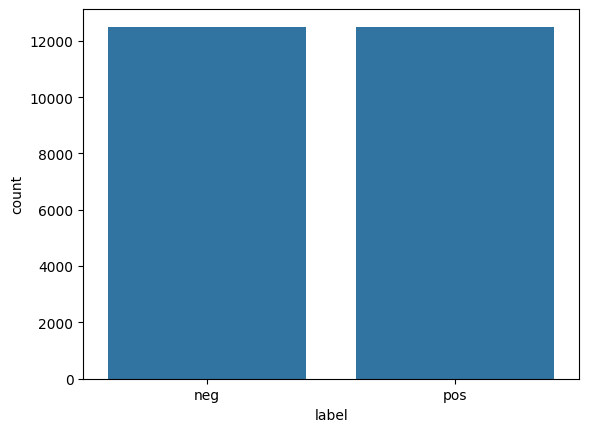

In [ ]:
sns.countplot(x = 'label', data = df)
plt.show()


In [ ]:
import random

random_indices = random.sample(range(len(df)), 10)

for index in random_indices:
  print(df['message'][index])
  print()


I mean really. This is not going to help the Australian film industry to make this kind of film with no values of any kind. Okay, if you're a stoner and have nothing better to do, then maybe. I think film-makers from here should try to show the rest of the world what great talented people we have, and this is not the vehicle for it. Come on now, this film is just tacky.

"THINGS TO COME" Movie Review by kWRice<br /><br />Here is another wonder filled science fiction film from a different time and place. It is a film I've only seen in truncated parts, but Art should be taken as a whole. I experienced this film as it was designed, in a darkened theatre, on a silver screen, with whirling reels of film and an audience to share it with. That audience and myself were effected by this film! One woman who lived through WW II was choked up by the remembered ravages of war and replenished by the positive, albeit corny, ending.<br /><br />The things that caught my attention from the beginning wer

Se puede ver que hay varias inconsistencias en las palabras, principalmente en las mayusculas, uso de signos de exclamacion y pregunta, guiones, puntos, comas, etc.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Preprocessing function
def preprocess(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#\w+', '', text)

    # Remove punctuations and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    text = ' '.join(tokens)

    return text

In [ ]:
# apply preprocess function to df
df['message_preprocessed'] = df['message'].apply(preprocess)
df

,message,label,cleaned_message,message_preprocessed
0,I saw this movie in NEW York city. I was waiti...,neg,saw movie new york city waiting bus next morni...,saw movie new york city waiting bus next morni...
1,This is a German film from 1974 that is someth...,neg,german film something woman come castle beyond...,german film something woman come castle beyond...
2,I attempted watching this movie twice and even...,neg,attempted watching movie twice even fast forwa...,attempted watching movie twice even fast forwa...
3,On his birthday a small boys tells his mother ...,neg,birthday small boy tell mother son want go hom...,birthday small boy tell mother son want go hom...
4,"The person who wrote the review ""enough with t...",pos,person wrote review enough sweating spitting a...,person wrote review enough sweating spitting a...
...,...,...,...,...
24995,"""Metamorphosis"" hold a tiny bit of cult-value,...",neg,metamorphosis hold tiny bit cultvalue simply w...,metamorphosis hold tiny bit cultvalue simply w...
24996,79/100. Fred Astaire and Ginger Rogers never m...,pos,fred astaire ginger rogers never made anything...,fred astaire ginger rogers never made anything...
24997,"As I watch this film, it is interesting to see...",neg,watch film interesting see much marginalizes b...,watch film interesting see much marginalizes b...
24998,"Huge, exhaustive and passionate summary of Ame...",pos,huge exhaustive passionate summary american ci...,huge exhaustive passionate summary american ci...


In [ ]:
# comparing message and message_preprocessed
print(df['message'][5])
print(df['message_preprocessed'][5])

Positively awful George Sanders vehicle where he goes from being a thief to police czar.<br /><br />While Sanders was an excellent character actor, he was certainly no leading man and this film proves it.<br /><br />It is absolutely beyond stupidity. Gene Lockhart did provide some comic relief until a moment of anger led him to fire his gun with tragedy resulting.<br /><br />Sadly, George Sanders and co-star Carol Landis committed suicide in real life. After making a film as deplorable as this, it is not shocking.<br /><br />The usual appealing Signe Hasso is really nothing here.
positively awful george sander vehicle go thief police czar sander excellent character actor certainly leading man film prof absolutely beyond stupidity gene lockhart provide comic relief moment anger led fire gun tragedy resulting sadly george sander costar carol landis committed suicide real life making film deplorable shocking usual appealing signe hasso really nothing


In [ ]:
# Converting 5th row into a list of words
words = df['message_preprocessed'][5].split()
print(words)

['positively', 'awful', 'george', 'sander', 'vehicle', 'go', 'thief', 'police', 'czar', 'sander', 'excellent', 'character', 'actor', 'certainly', 'leading', 'man', 'film', 'prof', 'absolutely', 'beyond', 'stupidity', 'gene', 'lockhart', 'provide', 'comic', 'relief', 'moment', 'anger', 'led', 'fire', 'gun', 'tragedy', 'resulting', 'sadly', 'george', 'sander', 'costar', 'carol', 'landis', 'committed', 'suicide', 'real', 'life', 'making', 'film', 'deplorable', 'shocking', 'usual', 'appealing', 'signe', 'hasso', 'really', 'nothing']


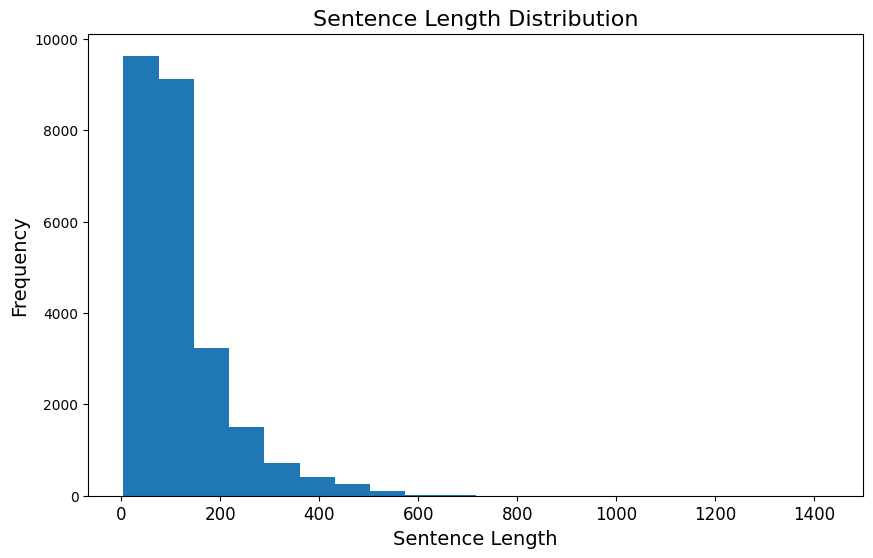

In [ ]:
# Do a histogram of how long the sentences are in the dataset
plt.figure(figsize=(10, 6))
# Title
plt.title("Sentence Length Distribution", fontsize=16) # Increased title font size
# X-axis label
plt.xlabel("Sentence Length", fontsize=14) # Increased x-axis label font size
# Y-axis label
plt.ylabel("Frequency", fontsize=14) # Increased y-axis label font size
plt.hist([len(x.split()) for x in df['message_preprocessed']], bins=20)
plt.xticks(fontsize=12) # Increased x-axis tick label font size
plt.show()

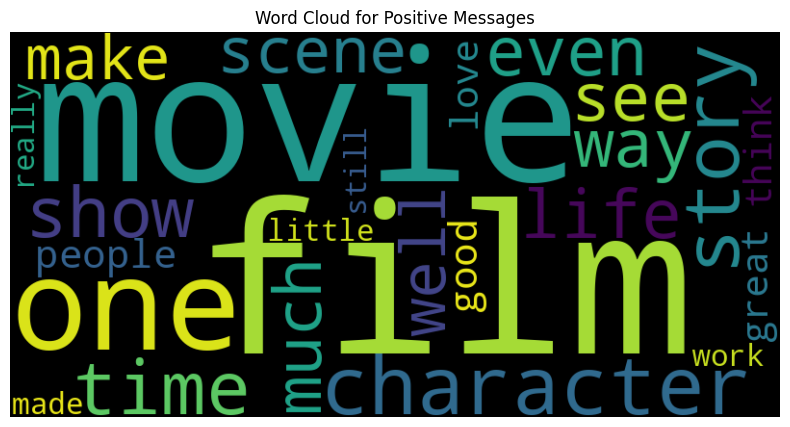

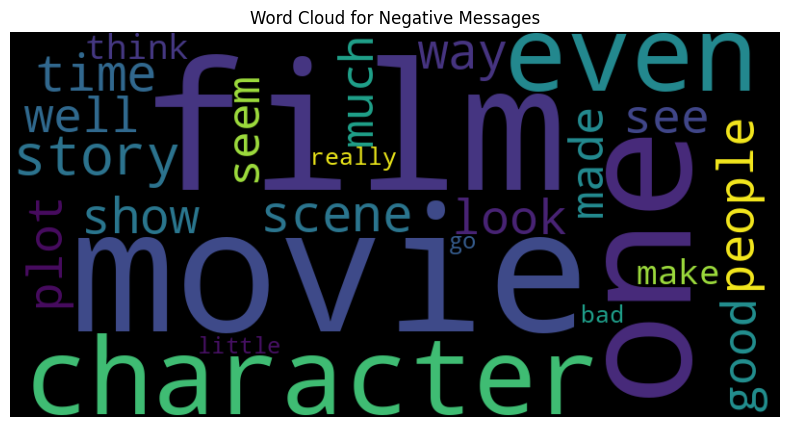

In [ ]:
# Wordcloud of top 15 words when label is pos and then another wordcloud when label is neg
from wordcloud import WordCloud

# Filter the dataframe for positive and negative labels
df_pos = df[df['label'] == 'pos']
df_neg = df[df['label'] == 'neg']

# Combine all preprocessed messages for each label
text_pos = ' '.join(df_pos['message_preprocessed'])
text_neg = ' '.join(df_neg['message_preprocessed'])

# Create and display the wordclouds
wordcloud_pos = WordCloud(width=800, height=400, max_words=25).generate(text_pos)
wordcloud_neg = WordCloud(width=800, height=400, max_words=25).generate(text_neg)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Messages")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Messages")
plt.show()

Ahora veremos lo del word2vec

In [ ]:
from gensim.models import word2vec
from sklearn.manifold import TSNE

In [ ]:
# Preprocessing function for word list
def preprocess_wordlist(data, stopwords=False):
    # Remove HTML tags
    review = BeautifulSoup(data, 'html.parser').get_text()

    # Remove non-letters
    review = re.sub('[^a-zA-Z]', ' ', review)

    # Convert to lower case
    review = review.lower()

    # Tokenize
    word = nltk.word_tokenize(review)

    # Optional: Remove stop words
    if stopwords:
        stops = set(nltk.corpus.stopwords.words("english"))
        words = [w for w in word if not w in stops]

    return word

# Preprocessing function for sentences
def preprocess_sent(data, stopwords=False):
    # Split the paragraph into sentences
    raw = nltk.sent_tokenize(data.strip())

    # Clean each sentence using preprocess_wordlist
    sentences = [preprocess_wordlist(sent, stopwords) for sent in raw if len(sent) > 0]

    return sentences

In [ ]:
# Prepare data for Word2Vec
sentences = []

# Combine all sentences from the dataframe
for message in df['message_preprocessed']:
    sentences += preprocess_sent(message)

# Train Word2Vec model
num_features = 250  # Dimensionality of the feature vectors
min_count = 40      # Minimum word count
num_processor = 4   # Number of threads to run in parallel
context = 10        # Context window size
downsampling = 0.001  # Downsample setting for frequent words



'''
vector_size: Determines the richness of the word representations.
min_count: Helps in filtering out less significant words, reducing noise.
workers: Speeds up the training process.
window: Defines the context size for each word, affecting how relationships between words are captured.
sample: Prevents very frequent words from dominating the training process.
init_sims(replace=True): Optimizes memory usage after training.

'''

model = word2vec.Word2Vec(sentences, workers=num_processor,
                          vector_size=num_features, min_count=min_count,
                          window=context, sample=downsampling)

# Optimize memory usage
model.init_sims(replace=True)

# Save the model
model_name = "250features_40minwords_10context"
model.save(model_name)


<ipython-input-44-c77423bef71c>:20: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


Total Number of Vocab: 7453

[-0.0492118   0.03093171 -0.06817347  0.07360462 -0.06642152 -0.00497479
  0.0295054   0.03501825 -0.07497017 -0.10884817]


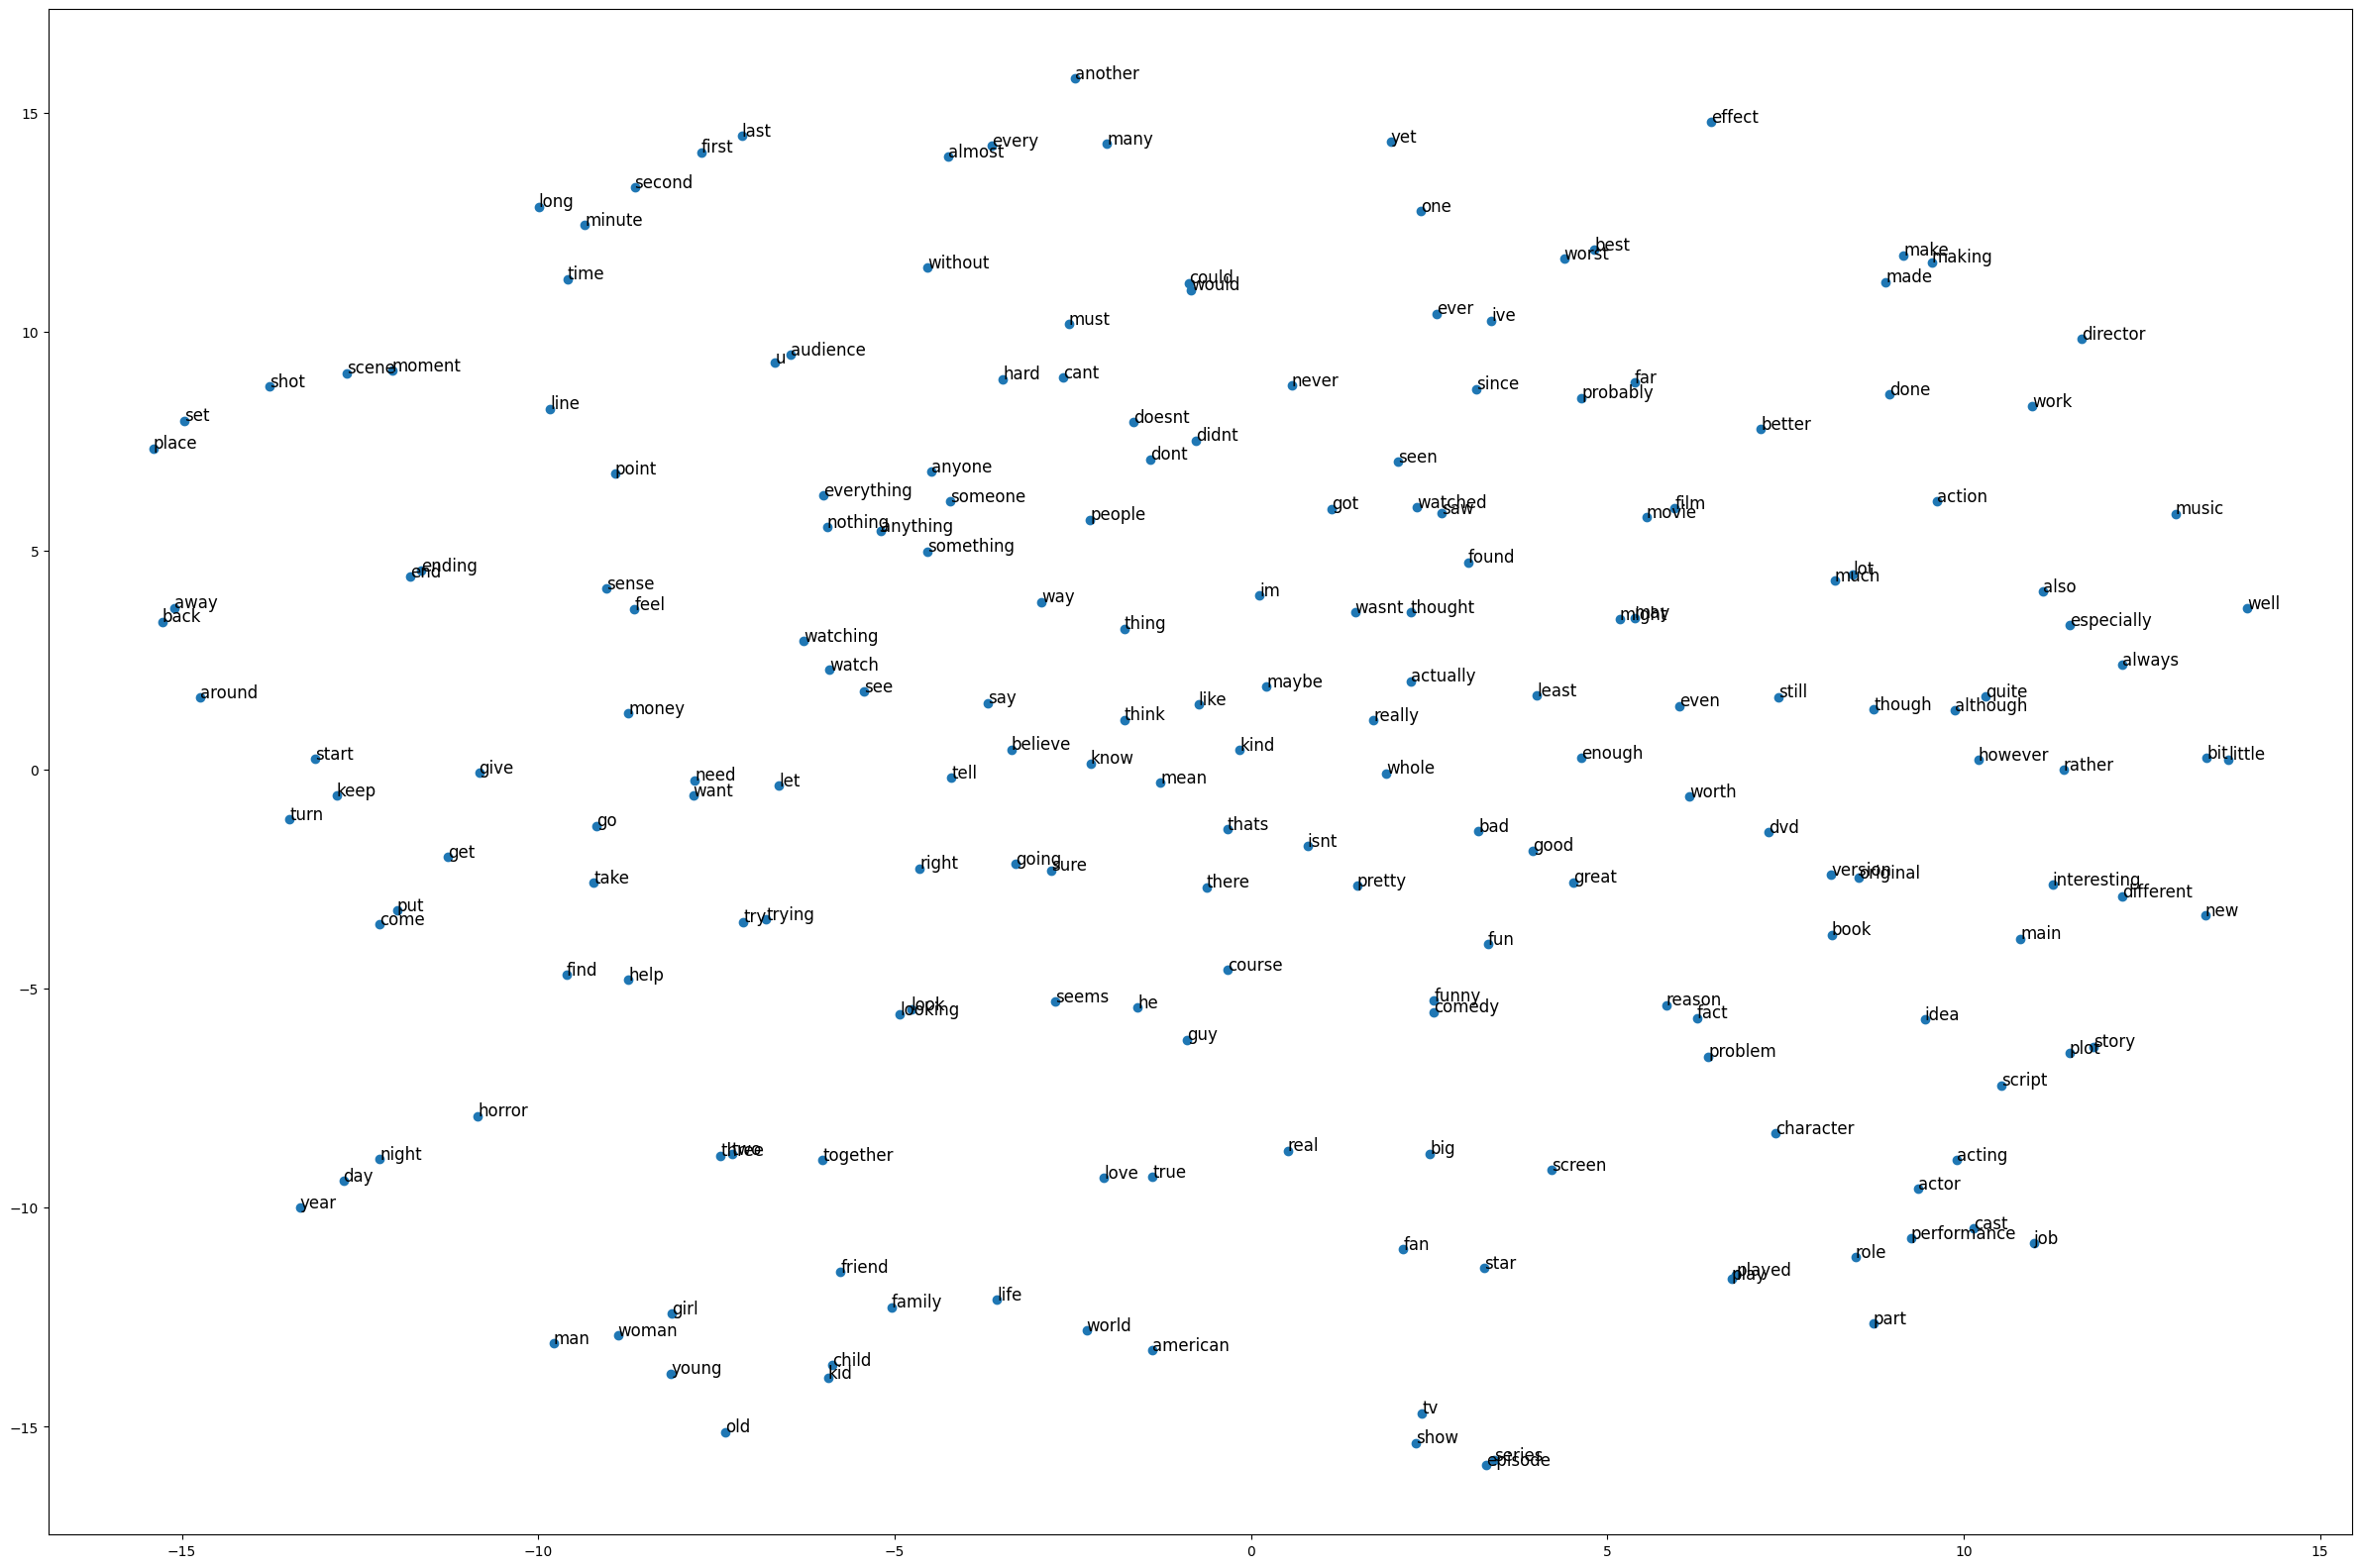

In [ ]:
# Visualization using t-SNE
vocab = list(model.wv.index_to_key)  # Extract vocabulary
X = model.wv[vocab]                  # Get word vectors

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])
# Visualize only 100 words
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:200, :])

# Create a DataFrame for the transformed data
df_tsne = pd.DataFrame(X_tsne, index=vocab[:200], columns=['X', 'Y'])
df_tsne.head()

# Plotting
fig = plt.figure()
fig.set_size_inches(30, 20)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_tsne['X'], df_tsne['Y'])

# Label each point
for word, pos in df_tsne.iterrows():
    ax.annotate(word, pos, fontsize=12)

plt.show()

In [ ]:
!pip install plotly



In [ ]:
!pip install umap-learn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00


In [ ]:
import plotly.express as px


# Visualization using t-SNE
vocab = list(model.wv.index_to_key)  # Extract vocabulary
X = model.wv[vocab]                  # Get word vectors

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])                     # Print first 10 elements of the first word vector

# Visualize only 100 words
tsne = TSNE(n_components=3)  # Change to 3 components for 3D
X_tsne = tsne.fit_transform(X[:100, :])

# Create a DataFrame for the transformed data
df_tsne = pd.DataFrame(X_tsne, index=vocab[:100], columns=['X', 'Y', 'Z'])
df_tsne.head()

# Plotting
fig = px.scatter_3d(df_tsne, x='X', y='Y', z='Z', text=df_tsne.index)

# Update layout for better visualization
fig.update_layout(
    title='3D t-SNE Visualization of Word Vectors',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show plot
fig.show()

Total Number of Vocab: 7453

[-0.0492118   0.03093171 -0.06817347  0.07360462 -0.06642152 -0.00497479
  0.0295054   0.03501825 -0.07497017 -0.10884817]


In [ ]:
import umap
import plotly.express as px
from gensim.models import Word2Vec
import pandas as pd

# Visualization using UMAP
vocab = list(model.wv.index_to_key)  # Extract vocabulary
X = model.wv[vocab]                  # Get word vectors

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])                     # Print first 10 elements of the first word vector

# Reduce dimensionality with UMAP
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X[:100, :])

# Create a DataFrame for the transformed data
df_umap = pd.DataFrame(X_umap, index=vocab[:100], columns=['X', 'Y', 'Z'])
df_umap.head()

# Plotting
fig = px.scatter_3d(df_umap, x='X', y='Y', z='Z', text=df_umap.index)

# Update layout for better visualization
fig.update_layout(
    title='3D UMAP Visualization of Word Vectors',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show plot
fig.show()


Total Number of Vocab: 7453

[-0.0492118   0.03093171 -0.06817347  0.07360462 -0.06642152 -0.00497479
  0.0295054   0.03501825 -0.07497017 -0.10884817]


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
import umap
import plotly.express as px
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import pandas as pd

# Visualization using UMAP
vocab = list(model.wv.index_to_key)  # Extract vocabulary
X = model.wv[vocab]                  # Get word vectors

# Reduce dimensionality to 40 features with UMAP
umap_reducer = umap.UMAP(n_components=100, random_state=42)
X_umap_40 = umap_reducer.fit_transform(X[:200, :]) # USAR 100 y 200

# Apply KMeans clustering
num_clusters = 12  # prev 8 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_umap_40)
labels = kmeans.labels_

# Further reduce dimensionality to 3 features for visualization
umap_reducer_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_reducer_3d.fit_transform(X_umap_40)

# Create a DataFrame for the transformed data
df_umap_3d = pd.DataFrame(X_umap_3d, index=vocab[:200], columns=['X', 'Y', 'Z'])
df_umap_3d['Cluster'] = labels
df_umap_3d.head()

# Plotting
fig = px.scatter_3d(df_umap_3d, x='X', y='Y', z='Z', color='Cluster', text=df_umap_3d.index)

# Update layout for better visualization
fig.update_layout(
    title='3D UMAP and KMeans Clustering Visualization of Word Vectors',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show plot
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
import umap
import plotly.express as px
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import pandas as pd

# Visualization using UMAP
vocab = list(model.wv.index_to_key)  # Extract vocabulary
X = model.wv[vocab]                  # Get word vectors

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])                     # Print first 10 elements of the first word vector

# Reduce dimensionality to 40 features with UMAP
umap_reducer = umap.UMAP(n_components=40, random_state=42)
X_umap_40 = umap_reducer.fit_transform(X[:100, :])

# Apply KMeans clustering
num_clusters = 5  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_umap_40)
labels = kmeans.labels_

# Further reduce dimensionality to 2 features for visualization
umap_reducer_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_reducer_2d.fit_transform(X_umap_40)

# Create a DataFrame for the transformed data
df_umap_2d = pd.DataFrame(X_umap_2d, index=vocab[:100], columns=['X', 'Y'])
df_umap_2d['Cluster'] = labels
df_umap_2d.head()

# Plotting
fig = px.scatter(df_umap_2d, x='X', y='Y', color='Cluster', text=df_umap_2d.index)

# Update layout for better visualization
fig.update_layout(
    title='2D UMAP and KMeans Clustering Visualization of Word Vectors',
    xaxis_title='X',
    yaxis_title='Y'
)

# Show plot
fig.show()


Total Number of Vocab: 7453

[-0.0492118   0.03093171 -0.06817347  0.07360462 -0.06642152 -0.00497479
  0.0295054   0.03501825 -0.07497017 -0.10884817]


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')

# Load the dataset
file_path = path
df = pd.read_csv(file_path)

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#\w+', '', text)

    # Remove punctuations and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    text = ' '.join(tokens)

    return text

# Apply the preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split the data
X = df['cleaned_message']
y = df['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8834
Classification Report:
              precision    recall  f1-score   support

         neg       0.89      0.88      0.88      2446
         pos       0.88      0.89      0.89      2554

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import string


# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Split the data
X = df['cleaned_message']
y = df['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF and MLP Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report)


Accuracy: 0.8256
Classification Report:
              precision    recall  f1-score   support

         neg       0.82      0.83      0.82      2446
         pos       0.83      0.82      0.83      2554

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
import string

# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the preprocessing to the message column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_message'])
X = tokenizer.texts_to_sequences(df['cleaned_message'])

# Pad the sequences
max_length = max(len(x) for x in X)
X = pad_sequences(X, maxlen=max_length, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Convert predictions to the original label encoding
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report)


Epoch 1/5
 29/313 [=>............................] - ETA: 31:22 - loss: 0.6934 - accuracy: 0.5124

KeyboardInterrupt: 